In [23]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

#autoreload modules
%load_ext autoreload
%autoreload 2

#import py-file for project
import Final_inauguralproject as model
#save the class as hoc
hoc = model.HouseholdOptimizationClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# how HM/HF reacts to a change in alpha and sigma
for alpha in [0.25,0.5,0.75]:
    for sigma in [0.5,1.0,1.5]:
        hoc.par.alpha=alpha
        hoc.par.sigma=sigma
        solve=hoc.solve_discrete()
        print(f'H_F = {solve.H_F}, H_M = {solve.H_M}, HF/HM = {solve.H_F/solve.H_M:5.3}, alpha = {hoc.par.alpha:4}, sigma={hoc.par.sigma}')
hoc.par.alpha=0.5
hoc.par.sigma=1.0

H_F = 3.0, H_M = 5.5, HF/HM = 0.545, alpha = 0.25, sigma=0.5
H_F = 2.0, H_M = 6.5, HF/HM = 0.308, alpha = 0.25, sigma=1.0
H_F = 1.5, H_M = 7.0, HF/HM = 0.214, alpha = 0.25, sigma=1.5
H_F = 4.5, H_M = 4.5, HF/HM =   1.0, alpha =  0.5, sigma=0.5
H_F = 4.5, H_M = 4.5, HF/HM =   1.0, alpha =  0.5, sigma=1.0
H_F = 4.5, H_M = 4.5, HF/HM =   1.0, alpha =  0.5, sigma=1.5
H_F = 5.5, H_M = 3.0, HF/HM =  1.83, alpha = 0.75, sigma=0.5
H_F = 6.5, H_M = 2.0, HF/HM =  3.25, alpha = 0.75, sigma=1.0
H_F = 7.0, H_M = 1.5, HF/HM =  4.67, alpha = 0.75, sigma=1.5


In [14]:
table = [] # create an empty table 
headers = ['Alpha', 'Sigma', 'H_F', 'H_M', 'H_F/H_M'] # create collumn header names

# how HM/HF reacts to a change in alpha and sigma
for alpha in [0.25, 0.5, 0.75]:
    for sigma in [0.5, 1.0, 1.5]:
        hoc.par.alpha = alpha
        hoc.par.sigma = sigma
        solve = hoc.solve_discrete()
        row = [alpha, sigma, solve.H_F, solve.H_M, solve.H_F / solve.H_M]
        table.append(row)

# reset parameter values
hoc.par.alpha=0.5
hoc.par.sigma=1.0

# print the table
print(tabulate(table, headers=headers, floatfmt=".3f"))


  Alpha    Sigma    H_F    H_M    H_F/H_M
-------  -------  -----  -----  ---------
  0.250    0.500  3.000  5.500      0.545
  0.250    1.000  2.000  6.500      0.308
  0.250    1.500  1.500  7.000      0.214
  0.500    0.500  4.500  4.500      1.000
  0.500    1.000  4.500  4.500      1.000
  0.500    1.500  4.500  4.500      1.000
  0.750    0.500  5.500  3.000      1.833
  0.750    1.000  6.500  2.000      3.250
  0.750    1.500  7.000  1.500      4.667


In [9]:
from tabulate import tabulate

table = []
alphas = [0.25, 0.5, 0.75]
sigmas = [0.5, 1.0, 1.5]

for alpha in alphas:
    row = [alpha]
    for sigma in sigmas:
        hoc.par.alpha = alpha
        hoc.par.sigma = sigma
        solve = hoc.solve_discrete()
        row.append(solve.H_F / solve.H_M)
    table.append(row)

headers = ['Alpha'] + [f'Sigma {sigma}' for sigma in sigmas]

print(tabulate(table, headers=headers, floatfmt=".3f"))


  Alpha    Sigma 0.5    Sigma 1.0    Sigma 1.5
-------  -----------  -----------  -----------
  0.250        0.545        0.308        0.214
  0.500        1.000        1.000        1.000
  0.750        1.833        3.250        4.667


In [17]:
Ting = []
for Y in range(1,10,1):
    Ting.append(Y)

Ting

[1, 2, 3, 4, 5, 6, 7, 8, 9]

H_F = 5.0, H_M = 4.0, w_F = 0.8, log(HF/HM) =  0.223, log(w_F/w_M)=-0.223
H_F = 4.5, H_M = 4.5, w_F = 0.9, log(HF/HM) =    0.0, log(w_F/w_M)=-0.105
H_F = 4.5, H_M = 4.5, w_F = 1.0, log(HF/HM) =    0.0, log(w_F/w_M)=   0.0
H_F = 4.0, H_M = 4.5, w_F = 1.1, log(HF/HM) = -0.118, log(w_F/w_M)=0.0953
H_F = 4.0, H_M = 5.0, w_F = 1.2, log(HF/HM) = -0.223, log(w_F/w_M)= 0.182


Text(0, 0.5, 'log(H_F/H_M)')

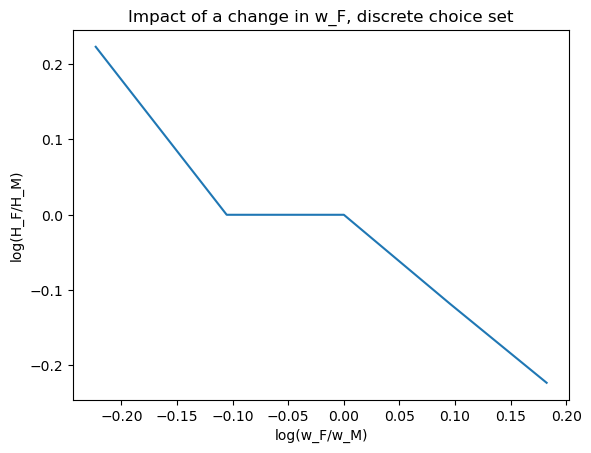

In [18]:
for w_F in hoc.par.w_F_vec:
    hoc.par.w_F=w_F
    solve=hoc.solve_discrete()
    print(f'H_F = {solve.H_F}, H_M = {solve.H_M}, w_F = {w_F}, log(HF/HM) = {np.log(solve.H_F/solve.H_M):6.3}, log(w_F/w_M)={np.log(w_F/hoc.par.w_M):6.3}')
#reset w_F
hoc.par.w_F=1
  
#create log(HF/HM) and log(WF/WM)
log_w_F_w_M=np.log(hoc.par.w_F_vec)

disc_log_H_F_H_M=[]

for wF in hoc.par.w_F_vec:
    hoc.par.w_F = hoc.par.w_F_vec
    value = np.log(hoc.solve_discrete)
    disc_log_H_F_H_M.append(value)




In [40]:
hoc.solve_discrete().L_M

6.0

In [48]:
# create empty list to store values
disc_log_H_F_H_M=[]

# run loop to find values for each w_F
for w_F in hoc.par.w_F_vec:
    hoc.par.w_F = w_F
    value = np.log(hoc.solve_discrete().H_F/hoc.solve_discrete().H_M)
    disc_log_H_F_H_M.append(value)

# reset w_F value
hoc.par.w_F = 1.0

[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]

In [49]:
hoc.par.w_F

1

Text(0, 0.5, 'log(H_F/H_M)')

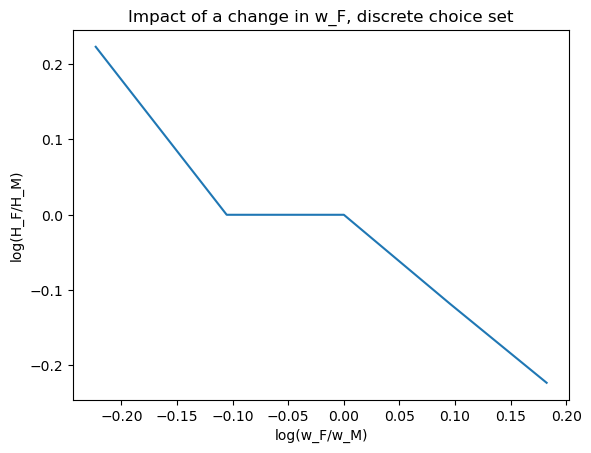

In [19]:
# a. create the figure
discfig = plt.figure()

# b. plot
discax = discfig.add_subplot(1,1,1)

discax.plot(log_w_F_w_M,disc_log_H_F_H_M)

discax.set_title('Impact of a change in w_F, discrete choice set')
discax.set_xlabel('log(w_F/w_M)')
discax.set_ylabel('log(H_F/H_M)')